Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# %matplotlib inline

In [20]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [167]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,15333.333333


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

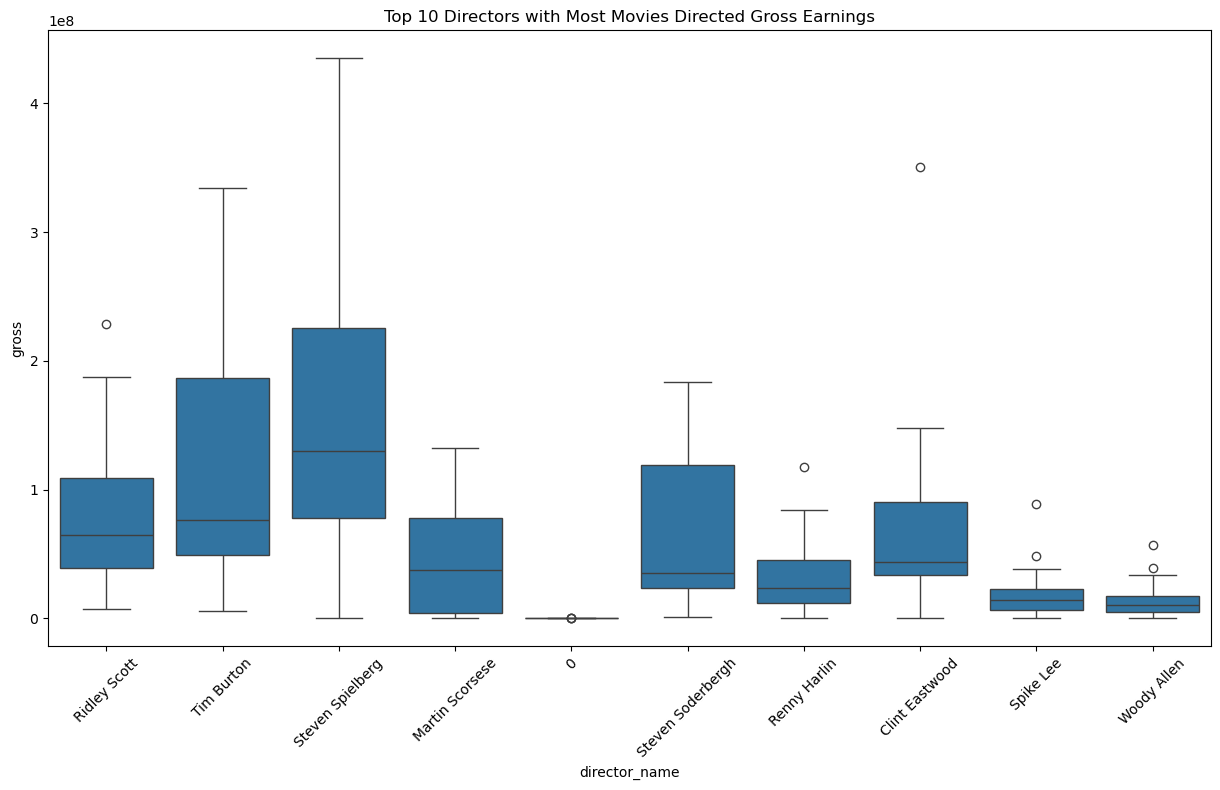

In [85]:
# Top 10 directors by number of movies
director_counts = data['director_name'].value_counts().head(10).index

# Filter data for these directors
top_directors_data = data[data['director_name'].isin(director_counts)]

# Plot boxplot for their gross earnings
plt.figure(figsize=(15, 8))
sns.boxplot(x='director_name', y='gross', data=top_directors_data)
plt.xticks(rotation=45)        # Rotate director names for readability
plt.title('Top 10 Directors with Most Movies Directed Gross Earnings')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

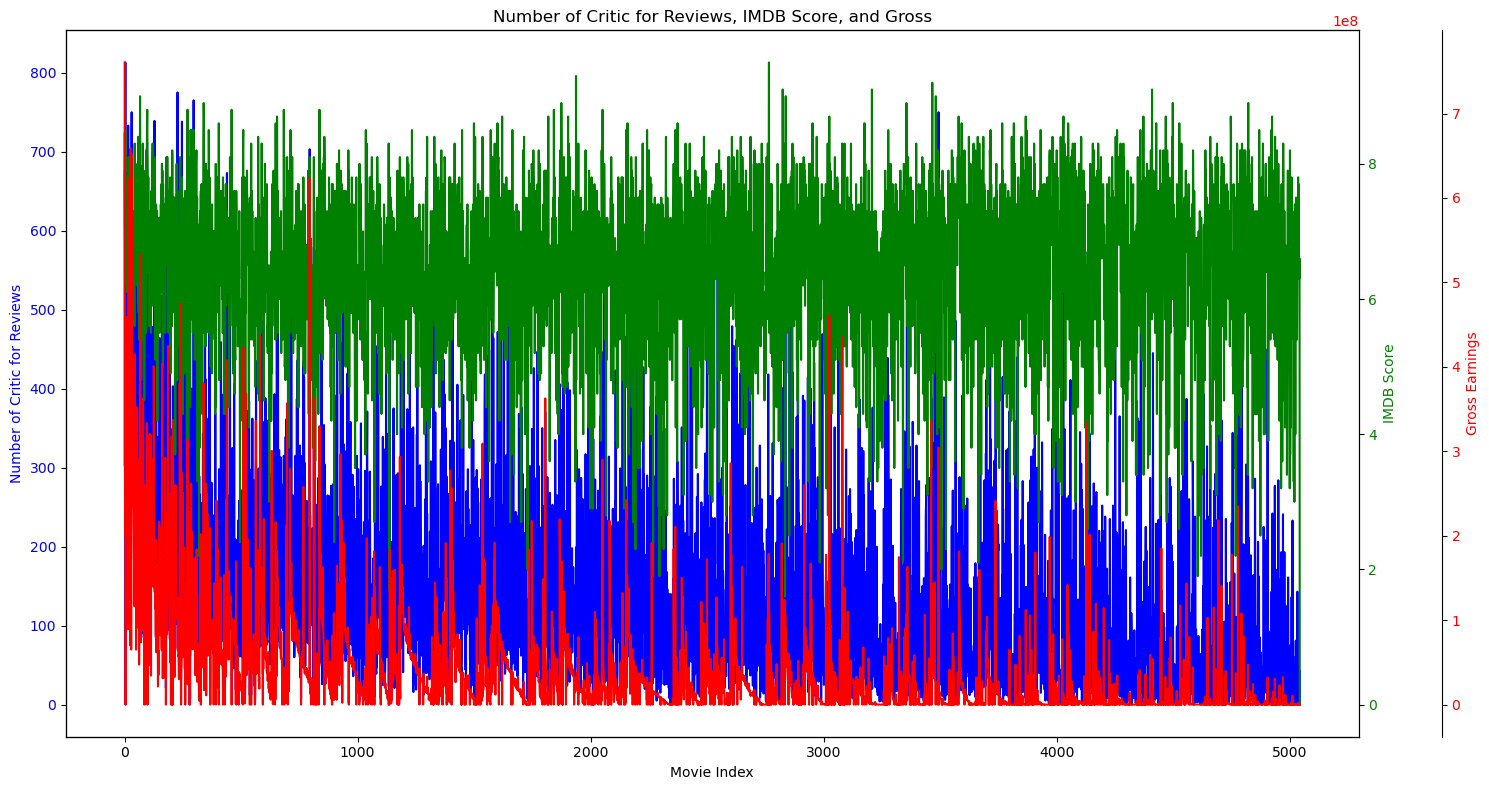

In [175]:
# Figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot num_critic_for_reviews on the primary y-axis
ax1.plot(data['num_critic_for_reviews'], label='Number of Critic Reviews', color='b')
ax1.set_xlabel('Movie Index')
ax1.set_ylabel('Number of Critic for Reviews', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Second y-axis for IMDB score
ax2 = ax1.twinx()
ax2.plot(data['imdb_score'], label='IMDB Score', color='g')
ax2.set_ylabel('IMDB Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Third y-axis for Gross earnings
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60)) 
ax3.plot(data['gross'], label='Gross Earnings', color='r')
ax3.set_ylabel('Gross Earnings', color='r')
ax3.tick_params(axis='y', labelcolor='r')

plt.title('Number of Critic for Reviews, IMDB Score, and Gross')
fig.tight_layout()  # To prevent overlap
plt.show()

##Compute Sales (Gross - Budget), add it as another column

In [70]:
# Calculate sales and add as a new column using Direct Column Assignment
data['sales'] = data['gross'] - data['budget']

# Check the updated data
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Which directors garnered the most total sales?

In [190]:
# Aggregate sales by director_name
director_sales = data.groupby('director_name')['sales'].sum()

# Convert the series to a dataFrame for better display
director_sales_df = director_sales.reset_index()
director_sales_df.columns = ['Director Name', 'Total Sales']

# Sort directors by total sales in descending order
director_sales_df = director_sales_df.sort_values(by='Total Sales', ascending=False)

director_sales_df.head()

,Director Name,Total Sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

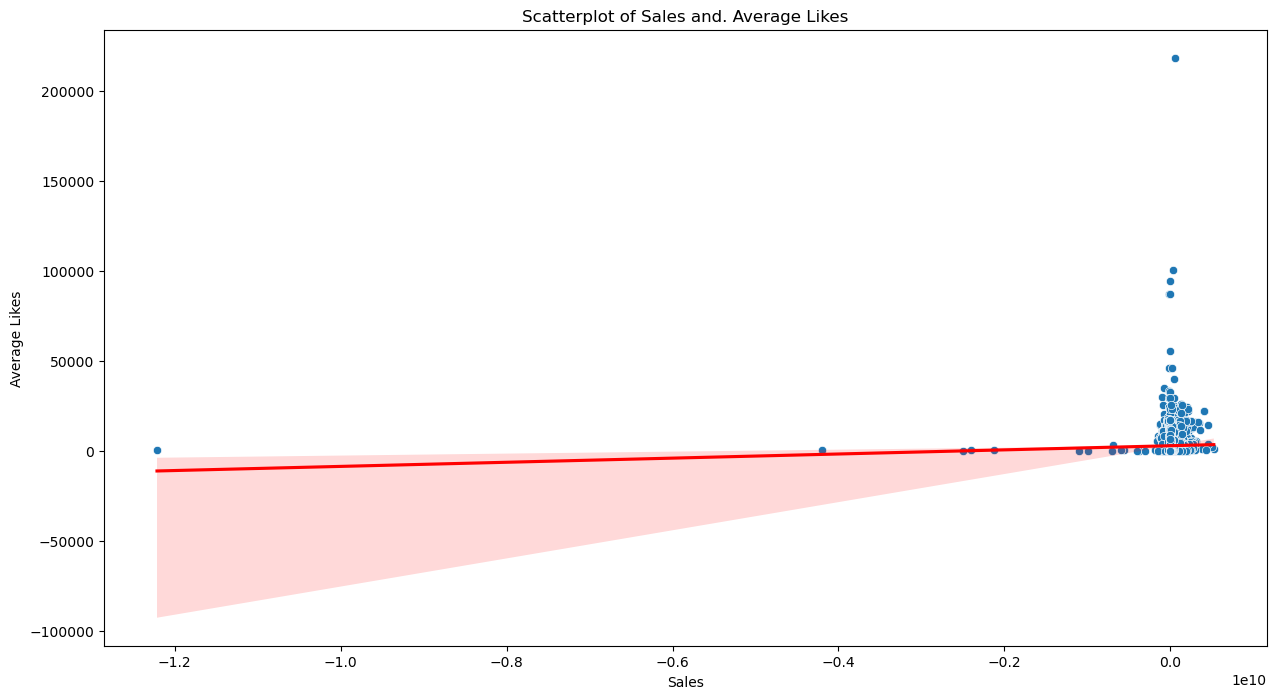

In [163]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='sales', y='average_likes', data=data)
sns.regplot(x='sales', y='average_likes', data=data, scatter=False, color='red')

plt.title('Scatterplot of Sales and. Average Likes')
plt.xlabel('Sales')
plt.ylabel('Average Likes')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

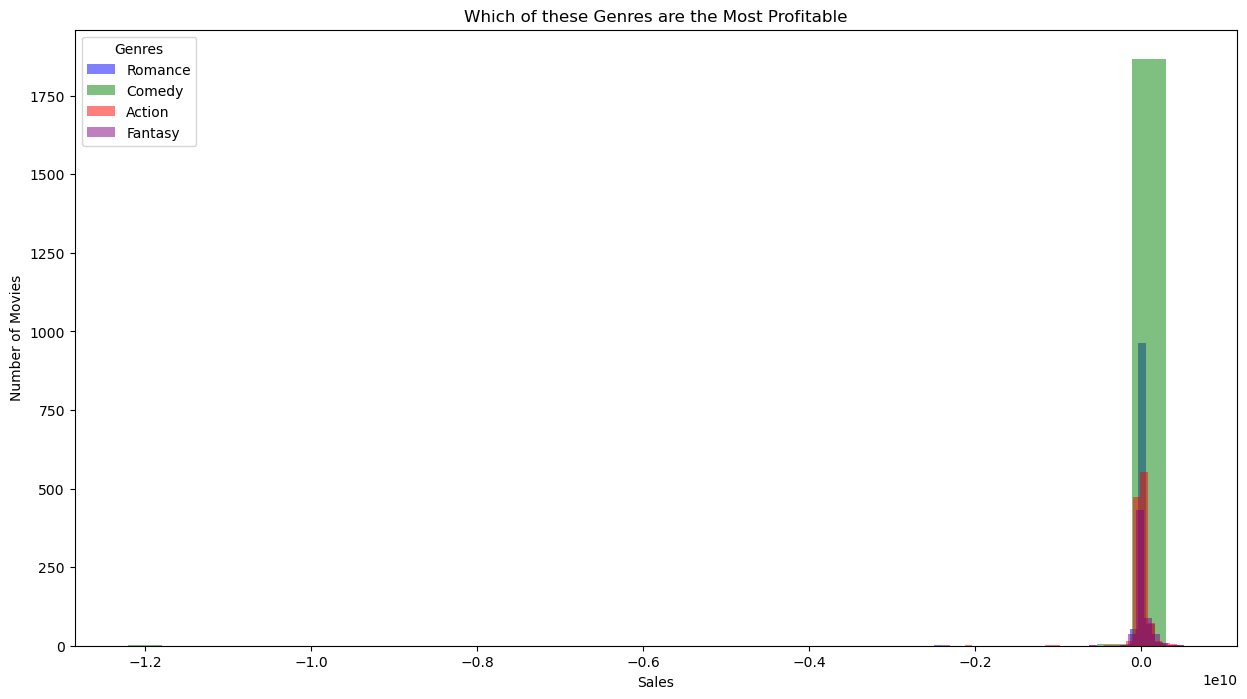

In [192]:
# Filter data for each genre
romance_data = data[data['genres'].str.contains('Romance', na=False)]
comedy_data = data[data['genres'].str.contains('Comedy', na=False)]
action_data = data[data['genres'].str.contains('Action', na=False)]
fantasy_data = data[data['genres'].str.contains('Fantasy', na=False)]

# Plotting histograms
plt.figure(figsize=(15, 8))
plt.hist(romance_data['sales'], bins=30, alpha=0.5, label='Romance', color='blue')
plt.hist(comedy_data['sales'], bins=30, alpha=0.5, label='Comedy', color='green')
plt.hist(action_data['sales'], bins=30, alpha=0.5, label='Action', color='red')
plt.hist(fantasy_data['sales'], bins=30, alpha=0.5, label='Fantasy', color='purple')

plt.title('Which of these Genres are the Most Profitable')
plt.xlabel('Sales')
plt.ylabel('Number of Movies')
plt.legend(title='Genres')
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [194]:
# Calculate the average likes for the three actors and create a new column
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']].head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,average_actor_likes
0,1000.0,936.0,855.0,930.333333
1,40000.0,5000.0,1000.0,15333.333333
2,11000.0,393.0,161.0,3851.333333
3,27000.0,23000.0,23000.0,24333.333333
4,131.0,12.0,0.0,47.666667


## Copying the whole dataframe

In [8]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [198]:
# Select only the integer columns
int_columns = df.select_dtypes(include=['int64']).columns

# Apply Min-Max normalization to each integer column
df[int_columns] = df[int_columns].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218,0.000218


In [200]:
# Select only the float columns
float_columns = df.select_dtypes(include=['float64']).columns

# Apply Min-Max normalization to each float column
df[float_columns] = df[float_columns].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218,0.000218
